In [15]:
import numpy as np
import random
import matplotlib.pyplot as plt


a=[[1,2,7],[3,4,8],[5,9,6]]
a=np.array(a)
c=np.transpose(a)
b=np.diag(a)
e=np.diag(np.diag(a))
print(b)
print(e)
d=np.trace(e)
print(d)

g=np.power(a,2)
print(g)

[1 4 6]
[[1 0 0]
 [0 4 0]
 [0 0 6]]
11
[[ 1  4 49]
 [ 9 16 64]
 [25 81 36]]
[1 4 6]
[[1 0 0]
 [0 4 0]
 [0 0 6]]
11
[[ 1  4 49]
 [ 9 16 64]
 [25 81 36]]


In [16]:
def square(x):
    return np.power(x,2)
square(a)

array([[ 1,  4, 49],
       [ 9, 16, 64],
       [25, 81, 36]], dtype=int32)

array([[ 1,  4, 49],
       [ 9, 16, 64],
       [25, 81, 36]], dtype=int32)

In [17]:
def chain_deriv(chain, input_range):
    
    assert len(chain)==2
    f1=Chain[0]

In [18]:
a=13
for i in range(1,a+1):
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13


In [19]:
a=np.arange(3).reshape(3,1)
print(a)
a+4

[[0]
 [1]
 [2]]


array([[4],
       [5],
       [6]])

[[0]
 [1]
 [2]]


array([[4],
       [5],
       [6]])

In [20]:
# 2.3.4 코드로 살펴보는 선형회귀linear regression

matrix= [[1,2,7],[3,4,8],[5,9,6]]
matrix=np.array(matrix)
y = [[1],[1],[1]]
y=np.array(y)
w = [[1],[1],[1]]
w=np.array(w)

B = np.random.randint(1,2,(1,1))

weights = {'W':w,'B':B} 

def forward_linear_Regression(X_batch, y_batch, weights):
    assert X_batch.shape[0] == y_batch.shape[0]
    assert X_batch.shape[1] == weights['W'].shape[0]
    assert weights['B'].shape[0] == weights['B'].shape[1]==1
    
    N=np.dot(X_batch,weights['W'])
    f= N+weights['B']
    loss=np.mean(np.power(y_batch-f,2))
    
    #순방향으로 갈때 중간값을 저장해가면서 진행
    forward_info={}
    forward_info['X']= X_batch
    forward_info['N']= N
    forward_info['f']= f
    forward_info['y']= y_batch
    
    return print('loss', loss), print('\n', forward_info)
    

forward_linear_Regression(matrix,y,weights)

print('B:',B)

o=1
for key in weights.keys():
    print(o,key)
    o=o+1

loss 241.66666666666666

 {'X': array([[1, 2, 7],
       [3, 4, 8],
       [5, 9, 6]]), 'N': array([[10],
       [15],
       [20]]), 'f': array([[11],
       [16],
       [21]]), 'y': array([[1],
       [1],
       [1]])}
B: [[1]]
1 W
2 B
loss 241.66666666666666

 {'X': array([[1, 2, 7],
       [3, 4, 8],
       [5, 9, 6]]), 'N': array([[10],
       [15],
       [20]]), 'f': array([[11],
       [16],
       [21]]), 'y': array([[1],
       [1],
       [1]])}
B: [[1]]
1 W
2 B


In [21]:
# 2.4.3 전체코드로 본 도함수 계산과정

matrix= [[1,2,7],[3,4,8],[5,9,6]]
matrix=np.array(matrix)
y = [[1],[1],[1]]
y=np.array(y)
w = [[1],[1],[1]]
w=np.array(w)
B = np.random.randint(1,2,(1,1))
weights = {'W':w,'B':B} 

loss_grad={}    # dJdW, dJdB 저장공간
forward_info={} # 순방향 저장공간


def loss_gradient(X_batch, y_batch, weights):
    assert X_batch.shape[0] == y_batch.shape[0]
    assert X_batch.shape[1] == weights['W'].shape[0]
    assert weights['B'].shape[0] == weights['B'].shape[1]==1
    
    N=np.dot(X_batch,weights['W'])
    f= N+weights['B']
    loss=np.sum(np.power(y_batch-f,2))
    
    print('N \n',N)
    print('f \n',f)
    print(loss)
    
    #순방향으로 갈때 중간값을 저장해가면서 진행
    forward_info['X']= X_batch
    forward_info['N']= N       # 
    forward_info['f']= f       # 예측값
    forward_info['y']= y_batch # 실제값

    # 2.4.3 전체코드로 본 도함수 계산과정

    batch_size=forward_info['X'].shape[0]
    dJdf=-2*(forward_info['y']-forward_info['f'])
    '''a(N,B)=N+B. N의 어떤 요소를 1단위 증가시키면 f의 값 역시 1단위 증가 따라서  
    dfdN의 모든 요소값이 1인 행렬이 되는 것'''  
    dfdN=np.ones_like(forward_info['N']) 
    dfdB=np.ones_like(forward_info['N'])
    dJdN=dJdf*dfdN 
    '''# ??=>이건 왜 구하는 거임? 48번째줄을 구할때 dot으로 여태까지 계산을 위해서인가...
    
       3X1 과 3X1을 어떻게 곱해지는지 이해가 안됐지만 그 이유가 '*'와 'np.dot'의 차이를 알아야한다.
       어짜피 연쇄법칙으로 쭉 곱해가면서 가야하는데 위의 식을 곱하기 위해선 무조건 행렬이라고
       dot의 개념을 곱하면 안되고 똑같이 곱하되 numpy.array의 성질을 이용(같은 열과 같은 행이면
       위와 같이 곱해됨)한다.
       그래서 위에서는 '*'을 이용했지만 밑에서는 np.dot을 이용한다(즉, 곱해야 하는 행렬의 꼴을 봐가면서 
       '*' 혹은 'np.dot'을 이용하면 된다고 판단. 허나 만약 이도저도 안된다면....이 아니라 만약 그렇다면
       아마 이 계산과정 자체가 나오지 않았을 것) '''
    dNdW=np.transpose(forward_info['X'],(1,0))
    
    
    print('\n dJdf')
    print(dJdf)
    
    print('\n dfdN')
    print(dfdN)
    
    print('\n dNdW')
    print(dNdW)
    
    print('\n dJdN=dJdf*dfdN')
    print(dJdN)
    
    dJdW=np.dot(dNdW, dJdN)
    dLdB=(dJdf*dfdB).sum(axis=0)

    
    loss_grad['W']=dJdW
    loss_grad['B']=dLdB

            
    return 

loss_gradient(matrix,y,weights)

print('==================================================================')

print('batch gradient descent')

def batch(loss_grad):
    for i in range(1,4):
        print('\n')
        print(i,'회 반복')
        for key in weights.keys():
            print('before')
            print(weights[key])
            weights[key] = weights[key]- 0.001 * loss_grad[key]
            print('after')
            print(weights[key])
batch(loss_grad)

N 
 [[10]
 [15]
 [20]]
f 
 [[11]
 [16]
 [21]]
725

 dJdf
[[20]
 [30]
 [40]]

 dfdN
[[1]
 [1]
 [1]]

 dNdW
[[1 3 5]
 [2 4 9]
 [7 8 6]]

 dJdN=dJdf*dfdN
[[20]
 [30]
 [40]]
batch gradient descent


1 회 반복
before
[[1]
 [1]
 [1]]
after
[[0.69]
 [0.48]
 [0.38]]
before
[[1]]
after
[[0.91]]


2 회 반복
before
[[0.69]
 [0.48]
 [0.38]]
after
[[ 0.38]
 [-0.04]
 [-0.24]]
before
[[0.91]]
after
[[0.82]]


3 회 반복
before
[[ 0.38]
 [-0.04]
 [-0.24]]
after
[[ 0.07]
 [-0.56]
 [-0.86]]
before
[[0.82]]
after
[[0.73]]
N 
 [[10]
 [15]
 [20]]
f 
 [[11]
 [16]
 [21]]
725

 dJdf
[[20]
 [30]
 [40]]

 dfdN
[[1]
 [1]
 [1]]

 dNdW
[[1 3 5]
 [2 4 9]
 [7 8 6]]

 dJdN=dJdf*dfdN
[[20]
 [30]
 [40]]
batch gradient descent


1 회 반복
before
[[1]
 [1]
 [1]]
after
[[0.69]
 [0.48]
 [0.38]]
before
[[1]]
after
[[0.91]]


2 회 반복
before
[[0.69]
 [0.48]
 [0.38]]
after
[[ 0.38]
 [-0.04]
 [-0.24]]
before
[[0.91]]
after
[[0.82]]


3 회 반복
before
[[ 0.38]
 [-0.04]
 [-0.24]]
after
[[ 0.07]
 [-0.56]
 [-0.86]]
before
[[0.82]]
after
[[0.73]]


In [22]:
# 미니배치

matrix= [[1,2,3],[2,2,3],[3,2,3],[4,2,3],[5,2,3],[6,2,3],[7,2,3],[8,2,3],[9,2,3]]
matrix=np.array(matrix)
y = [[1],[1],[1],[1],[1],[1],[1],[1],[1]]
y=np.array(y)
w = [[1],[1],[1]]
w=np.array(w)
B = np.random.randint(1,2,(1,1))
weights = {'W':w,'B':B} 

loss_grad={}    # dJdW, dJdB 저장공간
forward_info={} # 순방향 저장공간


def loss_gradient(X_batch, y_batch, weights):
    assert X_batch.shape[0] == y_batch.shape[0]
    assert X_batch.shape[1] == weights['W'].shape[0]
    assert weights['B'].shape[0] == weights['B'].shape[1]==1
    
    N=np.dot(X_batch,weights['W'])
    f= N+weights['B']
    loss=np.sum(np.power(y_batch-f,2))
    
    print('N \n',N)
    print('f \n',f)
    print('Loss:',loss)
    
    #순방향으로 갈때 중간값을 저장해가면서 진행
    forward_info['X']= X_batch
    forward_info['N']= N       # 
    forward_info['f']= f       # 예측값
    forward_info['y']= y_batch # 실제값

    # 전체코드로 본 도함수 계산과정

    batch_size=forward_info['X'].shape[0]
    dJdf=-2*(forward_info['y']-forward_info['f'])
    '''a(N,B)=N+B. N의 어떤 요소를 1단위 증가시키면 f의 값 역시 1단위 증가 따라서  
    dfdN의 모든 요소값이 1인 행렬이 되는 것'''  
    dfdN=np.ones_like(forward_info['N']) 
    dfdB=np.ones_like(forward_info['N'])
    dJdN=dJdf*dfdN 
    '''# ??=>이건 왜 구하는 거임? 48번째줄을 구할때 dot으로 여태까지 계산을 위해서인가...
    
       3X1 과 3X1을 어떻게 곱해지는지 이해가 안됐지만 그 이유가 '*'와 'np.dot'의 차이를 알아야한다.
       어짜피 연쇄법칙으로 쭉 곱해가면서 가야하는데 위의 식을 곱하기 위해선 무조건 행렬이라고
       dot의 개념을 곱하면 안되고 똑같이 곱하되 numpy.array의 성질을 이용(같은 열과 같은 행이면
       위와 같이 곱해됨)한다.
       그래서 위에서는 '*'을 이용했지만 밑에서는 np.dot을 이용한다(즉, 곱해야 하는 행렬의 꼴을 봐가면서 
       '*' 혹은 'np.dot'을 이용하면 된다고 판단. 허나 만약 이도저도 안된다면....이 아니라 만약 그렇다면
       아마 이 계산과정 자체가 나오지 않았을 것) '''
    dNdW=np.transpose(forward_info['X'],(1,0))
    
    
    dJdW=np.dot(dNdW, dJdN)
    dLdB=(dJdf*dfdB).sum(axis=0)

    
    loss_grad['W']=dJdW
    loss_grad['B']=dLdB

            
    return print(loss_grad)

#loss_gradient(matrix,y,weights)

print('==================================================================')

print('batch gradient descent')
def batch(loss_grad):
    for i in range(1,4):
        print('\n')
        print(i,'회 반복')
        for key in weights.keys():
            print('before')
            print(weights[key])
            weights[key] = weights[key]- 0.001 * loss_grad[key]
            print('after')
            print(weights[key])
#batch(loss_grad)

print('=============')

minibatch_size = 3
number_minibatch= np.int(np.ceil(matrix.shape[0]/minibatch_size))

for i in range(1, number_minibatch+1):
    print('\n',minibatch_size*i-(minibatch_size-1)-1,'~',minibatch_size*i-1,'열')
    matrix1=matrix[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]
    y1=y[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]
    loss_gradient(matrix1,y1,weights)
    
    for key in weights.keys():
        print(key)
        print('before')
        print(weights[key])
        weights[key]=weights[key]- 0.001 * loss_grad[key]
        print('after')
        print(weights[key])
        print('\n')
    print('=================================')    

batch gradient descent

 0 ~ 2 열
N 
 [[6]
 [7]
 [8]]
f 
 [[7]
 [8]
 [9]]
Loss: 149
{'W': array([[ 88],
       [ 84],
       [126]]), 'B': array([42])}
W
before
[[1]
 [1]
 [1]]
after
[[0.912]
 [0.916]
 [0.874]]


B
before
[[1]]
after
[[0.958]]



 3 ~ 5 열
N 
 [[8.102]
 [9.014]
 [9.926]]
f 
 [[ 9.06 ]
 [ 9.972]
 [10.884]]
Loss: 243.15384
{'W': array([[272.808],
       [107.664],
       [161.496]]), 'B': array([53.832])}
W
before
[[0.912]
 [0.916]
 [0.874]]
after
[[0.639192]
 [0.808336]
 [0.712504]]


B
before
[[0.958]]
after
[[0.904168]]



 6 ~ 8 열
N 
 [[8.228528]
 [8.86772 ]
 [9.506912]]
f 
 [[ 9.132696]
 [ 9.771888]
 [10.41108 ]]
Loss: 231.65519007936
{'W': array([[423.607392],
       [105.262656],
       [157.893984]]), 'B': array([52.631328])}
W
before
[[0.639192]
 [0.808336]
 [0.712504]]
after
[[0.21558461]
 [0.70307334]
 [0.55461002]]


B
before
[[0.904168]]
after
[[0.85153667]]


batch gradient descent

 0 ~ 2 열
N 
 [[6]
 [7]
 [8]]
f 
 [[7]
 [8]
 [9]]
Loss: 149
{'W': array([[ 88]

In [23]:
#early stopping 추가한 Algorithm of mini-batch SGD method
'''
에폭의 수를 정해 다 돌기 전에 끝내는 것 => 끝내는 이유는 모델이 너무 training data에 치우쳐 져 있어서 test data나
real data에서 모델의 성능이 낮아지는 경향을 막기 위해서 

1. 데이터를 training data, validation data, test data로 나눈다
2. 학습데이터만을 가지고 epoch이 한번 끝날 때마다 validation data로 시험을 해보는 것
3. validation accuracy가 증가하다가 계속 낮아지면 이때 학습을 멈추는 것(즉, validation accuracy가 최대일 때 멈춘다)
4. 이후 이 모델(validation accuray가 젤 높은 모델)에 test data를 이용하여 확인 해 보는 것
'''

'\n에폭의 수를 정해 다 돌기 전에 끝내는 것 => 끝내는 이유는 모델이 너무 training data에 치우쳐 져 있어서 test data나\nreal data에서 모델의 성능이 낮아지는 경향을 막기 위해서 \n\n1. 데이터를 training data, validation data, test data로 나눈다\n2. 학습데이터만을 가지고 epoch이 한번 끝날 때마다 validation data로 시험을 해보는 것\n3. validation accuracy가 증가하다가 계속 낮아지면 이때 학습을 멈추는 것(즉, validation accuracy가 최대일 때 멈춘다)\n4. 이후 이 모델(validation accuray가 젤 높은 모델)에 test data를 이용하여 확인 해 보는 것\n'

'\n에폭의 수를 정해 다 돌기 전에 끝내는 것 => 끝내는 이유는 모델이 너무 training data에 치우쳐 져 있어서 test data나\nreal data에서 모델의 성능이 낮아지는 경향을 막기 위해서 \n\n1. 데이터를 training data, validation data, test data로 나눈다\n2. 학습데이터만을 가지고 epoch이 한번 끝날 때마다 validation data로 시험을 해보는 것\n3. validation accuracy가 증가하다가 계속 낮아지면 이때 학습을 멈추는 것(즉, validation accuracy가 최대일 때 멈춘다)\n4. 이후 이 모델(validation accuray가 젤 높은 모델)에 test data를 이용하여 확인 해 보는 것\n'

In [24]:
matrix= [[1,2,3],[2,2,3],[3,2,3],[4,2,3],[5,2,3],[6,2,3],[7,2,3],[8,2,3],[9,2,3]]
matrix=np.array(matrix)
y = [[1],[1],[1],[1],[1],[1],[1],[1],[1]]
y=np.array(y)
w = [[1],[1],[1]]
w=np.array(w)
B = np.random.randint(1,2,(1,1))
weights = {'W':w,'B':B} 

loss_grad={}    # dJdW, dJdB 저장공간
forward_info={} # 순방향 저장공간


def loss_gradient(X_batch, y_batch, weights):
    assert X_batch.shape[0] == y_batch.shape[0]
    assert X_batch.shape[1] == weights['W'].shape[0]
    assert weights['B'].shape[0] == weights['B'].shape[1]==1
    
    N=np.dot(X_batch,weights['W'])
    f= N+weights['B']
    loss=np.sum(np.power(y_batch-f,2))
    
    print('N \n',N)
    print('f \n',f)
    print('Loss:',loss)
    
    #순방향으로 갈때 중간값을 저장해가면서 진행
    forward_info['X']= X_batch
    forward_info['N']= N       # 
    forward_info['f']= f       # 예측값
    forward_info['y']= y_batch # 실제값

    # 전체코드로 본 도함수 계산과정

    batch_size=forward_info['X'].shape[0]
    dJdf=-2*(forward_info['y']-forward_info['f'])
    '''a(N,B)=N+B. N의 어떤 요소를 1단위 증가시키면 f의 값 역시 1단위 증가 따라서  
    dfdN의 모든 요소값이 1인 행렬이 되는 것'''  
    dfdN=np.ones_like(forward_info['N']) 
    dfdB=np.ones_like(forward_info['N'])
    dJdN=dJdf*dfdN 
    '''# ??=>이건 왜 구하는 거임? 48번째줄을 구할때 dot으로 여태까지 계산을 위해서인가...
    
       3X1 과 3X1을 어떻게 곱해지는지 이해가 안됐지만 그 이유가 '*'와 'np.dot'의 차이를 알아야한다.
       어짜피 연쇄법칙으로 쭉 곱해가면서 가야하는데 위의 식을 곱하기 위해선 무조건 행렬이라고
       dot의 개념을 곱하면 안되고 똑같이 곱하되 numpy.array의 성질을 이용(같은 열과 같은 행이면
       위와 같이 곱해됨)한다.
       그래서 위에서는 '*'을 이용했지만 밑에서는 np.dot을 이용한다(즉, 곱해야 하는 행렬의 꼴을 봐가면서 
       '*' 혹은 'np.dot'을 이용하면 된다고 판단. 허나 만약 이도저도 안된다면....이 아니라 만약 그렇다면
       아마 이 계산과정 자체가 나오지 않았을 것) '''
    dNdW=np.transpose(forward_info['X'],(1,0))
    
    
    dJdW=np.dot(dNdW, dJdN)
    dLdB=(dJdf*dfdB).sum(axis=0)

    
    loss_grad['W']=dJdW
    loss_grad['B']=dLdB

            
    return print(loss_grad)

#loss_gradient(matrix,y,weights)

print('==================================================================')

print('batch gradient descent')
def batch(loss_grad):
    for i in range(1,4):
        print('\n')
        print(i,'회 반복')
        for key in weights.keys():
            print('before')
            print(weights[key])
            weights[key] = weights[key]- 0.001 * loss_grad[key]
            print('after')
            print(weights[key])
#batch(loss_grad)

minibatch_size = 3
number_minibatch= np.int(np.ceil(matrix.shape[0]/minibatch_size))
epoch_size=4

for j in range(1,epoch_size+1):
    print('*******',j,'번차 epoch*******')
    for i in range(1, number_minibatch+1):
        print('\n',minibatch_size*i-(minibatch_size-1)-1,'~',minibatch_size*i-1,'열')
        matrix1=matrix[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]
        y1=y[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]
        loss_gradient(matrix1,y1,weights)

        for key in weights.keys():
            print(key)
            print('before')
            print(weights[key])
            weights[key]=weights[key]- 0.0001 * loss_grad[key]
            print('after')
            print(weights[key])
            print('\n')


batch gradient descent
******* 1 번차 epoch*******

 0 ~ 2 열
N 
 [[6]
 [7]
 [8]]
f 
 [[7]
 [8]
 [9]]
Loss: 149
{'W': array([[ 88],
       [ 84],
       [126]]), 'B': array([42])}
W
before
[[1]
 [1]
 [1]]
after
[[0.9912]
 [0.9916]
 [0.9874]]


B
before
[[1]]
after
[[0.9958]]



 3 ~ 5 열
N 
 [[ 8.9102]
 [ 9.9014]
 [10.8926]]
f 
 [[ 9.906 ]
 [10.8972]
 [11.8884]]
Loss: 295.8286584
{'W': array([[300.8808],
       [118.7664],
       [178.1496]]), 'B': array([59.3832])}
W
before
[[0.9912]
 [0.9916]
 [0.9874]]
after
[[0.96111192]
 [0.97972336]
 [0.96958504]]
batch gradient descent
******* 1 번차 epoch*******

 0 ~ 2 열
N 
 [[6]
 [7]
 [8]]
f 
 [[7]
 [8]
 [9]]
Loss: 149
{'W': array([[ 88],
       [ 84],
       [126]]), 'B': array([42])}
W
before
[[1]
 [1]
 [1]]
after
[[0.9912]
 [0.9916]
 [0.9874]]


B
before
[[1]]
after
[[0.9958]]



 3 ~ 5 열
N 
 [[ 8.9102]
 [ 9.9014]
 [10.8926]]
f 
 [[ 9.906 ]
 [10.8972]
 [11.8884]]
Loss: 295.8286584
{'W': array([[300.8808],
       [118.7664],
       [178.1496]]), 

[11.93361121 14.58375929 11.51901162 11.38504438 13.53786781 11.16686658
 12.74264962 13.79516135 14.02718428 12.99710457 12.41924482 13.12563819
 13.49534889 13.04365119 13.03895853 14.75656321 12.30078044 14.7465863
 13.46398015 13.04291    13.07817289 15.16737133 13.27467888 16.15480926
 13.24358184 12.96386778 12.0560488  13.12867597 12.3475715  12.68173602
 11.78827537 12.41649776 12.20970655 15.3829664  14.21535566 15.19285236
 12.45306151 11.67216912 13.66589055 14.17237088 13.00860244 13.18931528
 11.77163003 14.17930321 14.07096425 12.96783146 13.34508278 13.34713414
 14.35670979 13.68224729 13.2318726  13.30929071 13.33385281 14.92346454
 14.11028873 13.31512464 12.08437727 11.59081697 13.10120182 13.36174526
 14.59144607 13.36691961 12.7784317  12.53213767 13.70541898 11.88659359
 12.96062448 13.85590957 12.86376071 12.34266085 13.30679609 12.25034639
 12.22579856 12.24545676 13.59814394 12.98544736 12.11065036 11.07672737
 14.19298355 13.63938079 12.54875296 13.05393236 13.

(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 1., 2., 0., 0., 0., 0., 1., 0., 0., 1.,
        2., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
        0., 2., 0., 0., 1., 0., 1., 1., 0., 1., 0., 2., 0., 1., 0., 1., 0.,
        1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 1., 3., 1., 1., 1., 2., 3., 0., 1.,
        1., 0., 2., 0., 0., 1., 0., 0., 2., 1., 1., 0., 2., 1., 1., 3., 2.,
        1., 0., 0., 0., 0., 1., 2., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
        1., 0., 2., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
        1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
        0., 

(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 1., 2., 0., 0., 0., 0., 1., 0., 0., 1.,
        2., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
        0., 2., 0., 0., 1., 0., 1., 1., 0., 1., 0., 2., 0., 1., 0., 1., 0.,
        1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 1., 3., 1., 1., 1., 2., 3., 0., 1.,
        1., 0., 2., 0., 0., 1., 0., 0., 2., 1., 1., 0., 2., 1., 1., 3., 2.,
        1., 0., 0., 0., 0., 1., 2., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
        1., 0., 2., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
        1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
        0., 

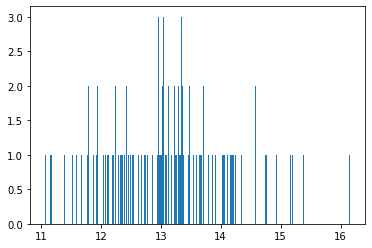

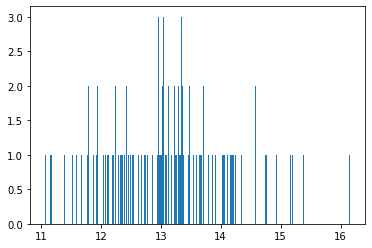

In [25]:
a=np.random.normal(13,1,size=100)
print(a)
plt.hist(a,bins=300)

[ 9.43911398  0.19607213 -7.88932517  7.6834067   3.44011633 -8.59921984
  5.00841932 -5.20696167  9.28719011  2.14315917]


(array([2., 1., 0., 0., 1., 1., 1., 1., 0., 3.]),
 array([-8.59921984, -6.79538645, -4.99155307, -3.18771969, -1.38388631,
         0.41994707,  2.22378045,  4.02761384,  5.83144722,  7.6352806 ,
         9.43911398]),
 <a list of 10 Patch objects>)

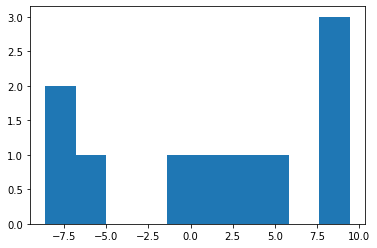

[ 9.43911398  0.19607213 -7.88932517  7.6834067   3.44011633 -8.59921984
  5.00841932 -5.20696167  9.28719011  2.14315917]


(array([2., 1., 0., 0., 1., 1., 1., 1., 0., 3.]),
 array([-8.59921984, -6.79538645, -4.99155307, -3.18771969, -1.38388631,
         0.41994707,  2.22378045,  4.02761384,  5.83144722,  7.6352806 ,
         9.43911398]),
 <a list of 10 Patch objects>)

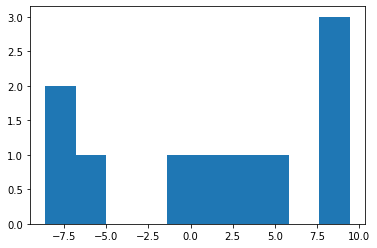

In [26]:
b=np.random.uniform(-10,10,size=10)
print(b)
plt.hist(b,bins=10)

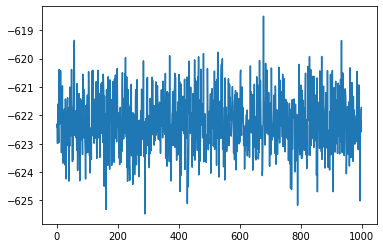

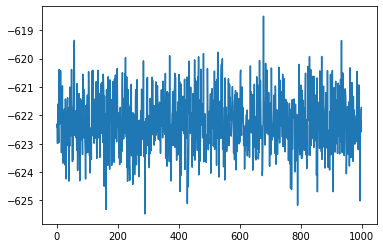

In [27]:
W= np.random.uniform(-10,10,size=1000)
b= np.random.uniform(-10,10,size=1000)
x= np.random.uniform(-10,10,size=1000)

W=np.reshape(W,(1000,1))
b=np.reshape(b,(1000,1))
x=np.reshape(x,(1000,1))

mu=np.dot(np.transpose(W),x)+b
sigma=0.1*10

y=np.random.normal(mu,sigma,size=1000)

plt.plot(y)
plt.show()


In [29]:
xlis = []
ylis = []
flis = [] 
wlis = []

def data_set(R,size):
    weights={}
    data_set={}
    
    W= np.random.uniform(-R,R,size=size)
    b= np.random.uniform(-R,R,size=size)
    b= random.choice(b)

    for i in range(20):
        x = np.random.uniform(-R,R,size=size)
        y = np.random.normal(W*x+b,1,size=size)
        xlis.append(x)
        ylis.append(y)
        flis.append(W*x+b)
        
    x=np.array(xlis)
    y=np.array(ylis)

    result=np.concatenate((x,y),axis=1)
    
    train_idx=int(result.shape[0]*0.85)
    dev_idx=int(result.shape[0]*0.05)
    test_idx=int(result.shape[0]*0.1)

    train_data_set=result[0:train_idx,:]
    test_data_set=result[train_idx:train_idx+test_idx,:]
    dev_data_set=result[train_idx+test_idx:train_idx+test_idx+dev_idx,:]
    
    weights['W']=W
    weights['B']=b
    
    data_set['train_data_set']=train_data_set
    data_set['dev_data_set']=dev_data_set
    data_set['test_data_set']=test_data_set

    
    return print(weights, data_set)
'''
plt.scatter(xlis,flis)
plt.scatter(xlis,ylis)
plt.xlabel('x')
plt.ylabel('y')
'''
#print(result[:,0])

def linear_regression(minibatch_size, epoch_size):
    R=10
    size=1
    weights={}
    #data_set={}    
    loss_grad={}    # dJdW, dJdB 저장공간
    forward_info={} # 순방향 저장공간
    batch={}
    
    W= np.random.uniform(-R,R,size=size)
    b= np.random.uniform(-R,R,size=size)
    b= random.choice(b)

    for i in range(10):
        x = np.random.uniform(-R,R,size=size)
        y = np.random.normal(W*x+b,1,size=size)
        xlis.append(x)
        ylis.append(y)
        flis.append(W*x+b)
        
    x=np.array(xlis)
    y=np.array(ylis)
    
    weights['W']=W
    weights['B']=b

    
    result=np.concatenate((x,y),axis=1)
    
    train_idx=int(result.shape[0]*0.85)
    dev_idx=int(result.shape[0]*0.05)
    test_idx=int(result.shape[0]*0.1)

    train_data_set=result[0:train_idx,:]
    test_data_set=result[train_idx:train_idx+test_idx,:]
    dev_data_set=result[train_idx+test_idx:train_idx+test_idx+dev_idx,:]
    
#    data_set['train_data_set']=train_data_set
#    data_set['dev_data_set']=dev_data_set
#    data_set['test_data_set']=test_data_set

    X_batch= train_data_set[:,0]
    y_batch= train_data_set[:,1]
    X_batch=np.reshape(X_batch,(train_idx,size))
    y_batch=np.reshape(y_batch,(train_idx,size))

#    assert X_batch.shape[0] == y_batch.shape[0]
#    assert X_batch.shape[1] == weights['W'].shape[0]

#    def loss_grad(X,W,B,y):

    N=weights['W']*X_batch
    f= N+weights['B']
    loss=np.mean(np.power(y_batch-f,2))

    #순방향으로 갈때 중간값을 저장해가면서 진행
    forward_info['X']= X_batch
    forward_info['N']= N       # 
    forward_info['f']= f       # 예측값
    forward_info['y']= y_batch # 실제값

    # 전체코드로 본 도함수 계산과정
    batch_size=forward_info['X'].shape[0]
    dJdf=-2*(forward_info['y']-forward_info['f'])
    dfdN=np.ones_like(forward_info['N']) 
    dfdB=np.ones_like(forward_info['N'])
    dJdN=dJdf*dfdN 
    dNdW=np.transpose(forward_info['X'],(1,0))

    dJdW=np.dot(dNdW, dJdN)
    dLdB=(dJdf*dfdB).sum(axis=0)

    loss_grad['W']=dJdW
    loss_grad['B']=dLdB

    print('==================================================================')
    
    for j in range(1,epoch_size+1):
        print('*******',j,'번차 epoch*******')
        result=np.random.permutation(result)
   
        X_batch= train_data_set[:,0]
        y_batch= train_data_set[:,1]
        X_batch=np.reshape(X_batch,(train_idx,size))
        y_batch=np.reshape(y_batch,(train_idx,size))

        number_minibatch= np.int(np.ceil(X_batch.shape[0]/minibatch_size))
    
    #    assert X_batch.shape[0] == y_batch.shape[0]
    #    assert X_batch.shape[1] == weights['W'].shape[0]

        
        for i in range(1, number_minibatch+1):
            print(X_batch)
            print('\n',minibatch_size*i-(minibatch_size-1)-1,'~',minibatch_size*i-1,'열')
            X_batch1=X_batch[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]
            y1=y_batch[minibatch_size*i-(minibatch_size-1)-1:minibatch_size*i]
            
            print(X_batch1)
            print(y1)
            
            N=weights['W']*X_batch1
            f= N+weights['B']
            loss=np.mean(np.power(y1-f,2))
            
            forward_info['X']= X_batch1
            forward_info['N']= N       # 
            forward_info['f']= f       # 예측값
            forward_info['y']= y1 # 실제값

            # 전체코드로 본 도함수 계산과정
            batch_size=forward_info['X'].shape[0]
            dJdf=-2*(forward_info['y']-forward_info['f'])
            dfdN=np.ones_like(forward_info['N']) 
            dfdB=np.ones_like(forward_info['N'])
            dJdN=dJdf*dfdN 
            dNdW=np.transpose(forward_info['X'],(1,0))

            dJdW=np.dot(dNdW, dJdN)
            dLdB=(dJdf*dfdB).sum(axis=0)

            loss_grad['W']=dJdW
            loss_grad['B']=dLdB
        print('before')
        print(weights)
        
        for key in weights.keys():
            weights[key]=weights[key]- 0.00001 * loss_grad[key]
        print('after')
        print(weights)
        print('Loss',loss)
        print('=================================')
linear_regression(5,3)
    

******* 1 번차 epoch*******
[[ 2.34964358]
 [-5.60161284]
 [ 1.75930177]
 [-5.33797775]
 [ 6.83478272]
 [-8.29237053]
 [-9.80393446]
 [ 0.18769674]]

 0 ~ 4 열
[[ 2.34964358]
 [-5.60161284]
 [ 1.75930177]
 [-5.33797775]
 [ 6.83478272]]
[[ -5.685621  ]
 [  3.05897035]
 [ -5.32332996]
 [ -0.61219415]
 [-10.17283934]]
[[ 2.34964358]
 [-5.60161284]
 [ 1.75930177]
 [-5.33797775]
 [ 6.83478272]
 [-8.29237053]
 [-9.80393446]
 [ 0.18769674]]

 5 ~ 9 열
[[-8.29237053]
 [-9.80393446]
 [ 0.18769674]]
[[ 2.44864197]
 [ 4.9191643 ]
 [-3.52983037]]
before
{'W': array([-0.83959744]), 'B': -3.999148904747316}
after
{'W': array([[-0.83964446]]), 'B': array([-3.99913292])}
Loss 0.37653078442212284
******* 2 번차 epoch*******
[[ 2.34964358]
 [-5.60161284]
 [ 1.75930177]
 [-5.33797775]
 [ 6.83478272]
 [-8.29237053]
 [-9.80393446]
 [ 0.18769674]]

 0 ~ 4 열
[[ 2.34964358]
 [-5.60161284]
 [ 1.75930177]
 [-5.33797775]
 [ 6.83478272]]
[[ -5.685621  ]
 [  3.05897035]
 [ -5.32332996]
 [ -0.61219415]
 [-10.17283934]]
[